In [79]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
%matplotlib inline

506

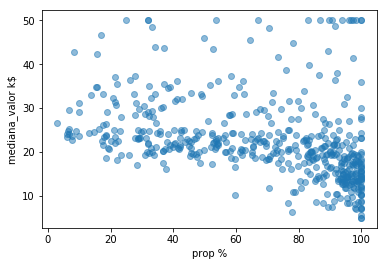

In [51]:
# carga de datos
datos = pd.read_csv('/home/mauricio/Documents/Uni/Aprendizaje_de_maquinas_probabilistico/datosT1.csv', delimiter=',', header=None)
datos.columns = ['prop', 'med_val']

# plot
plt.scatter(datos['prop'], datos['med_val'], alpha=0.5)
plt.xlabel('prop %')
plt.ylabel('mediana_valor k$')

[-0.12316272 30.97867776]
[-0.1179253  30.55912855]
[-0.11282786 30.1507927 ]
[-0.10786487 29.7532266 ]
[-0.10303107 29.36600972]
[-0.0983215  28.98874315]
[-0.09373141 28.6210482 ]
[-0.08925631 28.26256519]
[-0.08489195 27.9129522 ]
[-0.08063426 27.57188406]


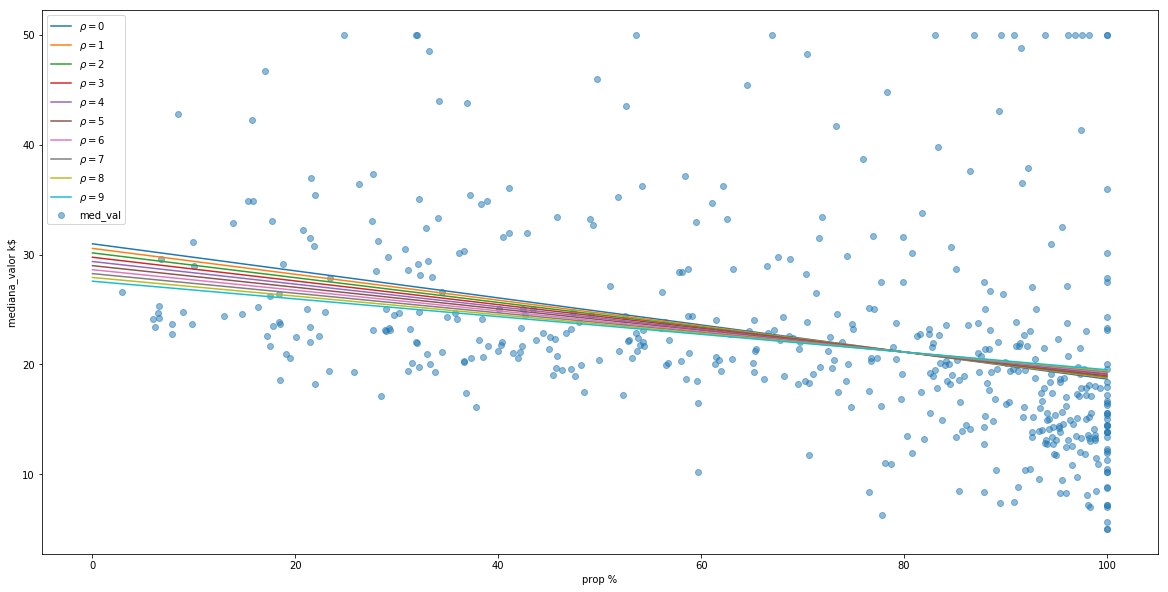

In [84]:
# regresion
matplotlib.rcParams['figure.figsize'] = (20, 10)
fg = (100, 100)
X = np.vstack((datos['prop'], np.ones(len(datos)))).T
Y = datos['med_val'].values
rec = np.linspace(0, 100, 10)
plt.scatter(datos['prop'], datos['med_val'], alpha=0.5)
plt.xlabel('prop %')
plt.ylabel('mediana_valor k$')
for rho in np.arange(0, 10, 1):
    Theta = np.linalg.inv(X.T@X + rho*np.identity(2))@X.T@Y
    print(Theta)
    reg = Theta[0]*rec + Theta[1]   
    plt.plot(rec, reg, label=r'$\rho = $'+str(rho))
plt.legend()

In [86]:
# funcion de costo
x1 = np.linspace(-1, 0, 100)
x2 = np.linspace(20, 40, 100)
X1, X2 = np.meshgrid(x1, x2)
X2

array([[20.       , 20.       , 20.       , ..., 20.       , 20.       ,
        20.       ],
       [20.2020202, 20.2020202, 20.2020202, ..., 20.2020202, 20.2020202,
        20.2020202],
       [20.4040404, 20.4040404, 20.4040404, ..., 20.4040404, 20.4040404,
        20.4040404],
       ...,
       [39.5959596, 39.5959596, 39.5959596, ..., 39.5959596, 39.5959596,
        39.5959596],
       [39.7979798, 39.7979798, 39.7979798, ..., 39.7979798, 39.7979798,
        39.7979798],
       [40.       , 40.       , 40.       , ..., 40.       , 40.       ,
        40.       ]])